In [25]:
#Name: Kshitij Khaladkar
#UTA ID: 1001713442

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('C:/Users/kshit/Desktop/Masters/Sem_4/Data Mining/Titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [28]:
df.shape

(1309, 14)

In [29]:
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [30]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [31]:
survivors = df.groupby('survived')['survived'].count()
survivors

survived
0    809
1    500
Name: survived, dtype: int64

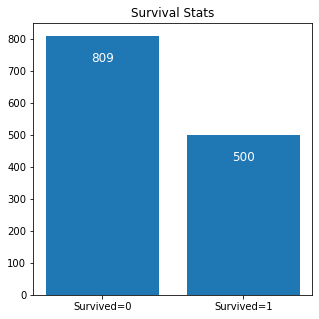

In [32]:
plt.figure(figsize=(5,5))
plt.bar(survivors.index, survivors.values)
plt.title('Survival Stats')
plt.xticks([0,1],['Survived=0', 'Survived=1'])
for i, value in enumerate(survivors.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

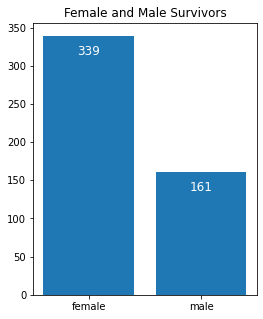

In [33]:
survivors_sex = df.groupby('sex')['survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survivors_sex.index, survivors_sex.values)
plt.title('Female and Male Survivors')
for i, value in enumerate(survivors_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [34]:
pop_by_class = df.groupby('pclass')['pclass'].count()

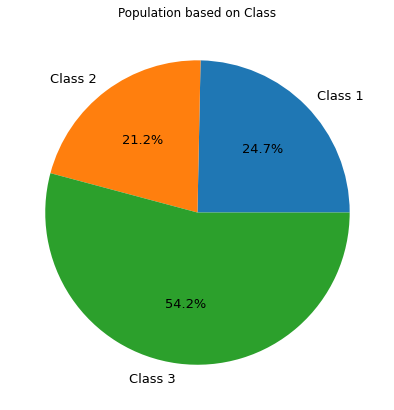

In [35]:
plt.figure(figsize=(7,7))
plt.title('Population based on Class')
plt.pie(pop_by_class.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [36]:
df['age'].replace('?',np.NaN,inplace=True)

In [37]:
df['age'] = df.age.astype(float)

In [38]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

In [39]:
survive_by_age = df[df['age'].notnull()]['age'].values

In [40]:
survive_by_age_hist = np.histogram(survive_by_age, bins=[0,20,40,60,80,100])
survive_by_age_hist

(array([225, 576, 205,  39,   1], dtype=int64),
 array([  0,  20,  40,  60,  80, 100]))

In [41]:
survive_by_age_hist_labels = ['0–20', '21–40', '31-60', '61–80', '81–100']

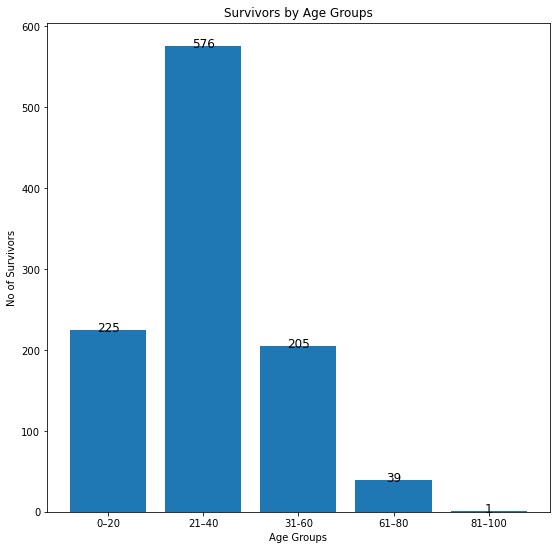

In [42]:
plt.figure(figsize=(9,9))
plt.title('Survivors by Age Groups')
plt.bar(survive_by_age_hist_labels, survive_by_age_hist[0])
plt.xlabel('Age Groups')
plt.ylabel('No of Survivors')
for i, bin in zip(survive_by_age_hist[0], range(5)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [43]:
df.groupby(['pclass'])['survived'].sum()/df.groupby(['pclass'])['survived'].count()*100


pclass
1    61.919505
2    42.960289
3    25.528914
Name: survived, dtype: float64

In [44]:
df.groupby(['pclass'])['survived'].count()

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

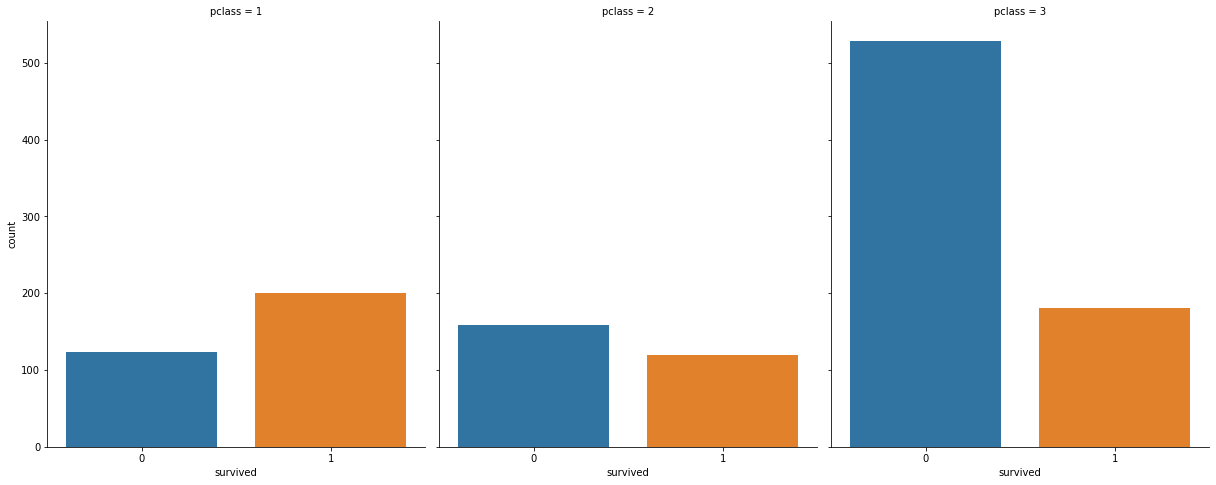

In [45]:
sns.catplot(x='survived', col='pclass', data=df, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.9)
#plt.title("Class wise segregation of passengers", size=16)

In [46]:
df['fare'].replace('?',np.NaN,inplace=True)
df['fare'] = df.fare.astype(float)
fares = df[df['fare'].notnull()]['fare'].values
fares_hist = np.histogram(fares, bins=[0,30,60,90,120,150,180,250,500,550])
fares_hist
#sns.catplot(x='fare', y='pclass', data=df)

(array([958, 164,  91,  24,  20,  13,  21,  13,   4], dtype=int64),
 array([  0,  30,  60,  90, 120, 150, 180, 250, 500, 550]))

In [47]:
#Which people most likely survived?  
#Young/Old/Middle? : From the given dataset we can see that people betwwen the ages 21-60 i.e Middle ged people most likely survived.
#Female/Male? : From the given dataset we can see that amongst the survivors 339 were females i.e females most likely survived.
#Rich/Poor? : From the given dataset we can see 61.919505% of class 1 people have survived and classes 2 and 3 combined have 68.489203% survivors.
#This suggests that Rich people are more likely to survive.

In [48]:
#References:

#https://seaborn.pydata.org/tutorial/categorical.html
#https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma
#https://www.w3schools.com/python/matplotlib_histograms.asp